# Repaso

# Dimensionalidad

# Aprendize No Supervisado

Corresponde a la ausencia de informacion sobre el vector objetivo. Lo que se quiere hacer es agrupar
o tratar las variables de X.

Usualmente lo que se hace es agrupar datos (clustering) o reducir la dimension (cantidad de 
variables)

# La maldicion de la dimensionalidad

Cuando se va aumentando la cantidad de variables/dimensiones/columnas/X dentro de un modelo, 
entonces la distancia entre puntos va aumentando!

- Si tengo una linea recta (dimension 2), entonces las distancias estan acotadas a dos dimensiones.
Debido a esto, las distancias son pequenas
- Ahora, si aumento la dimensionalidad a 10, las distancias aumentaran, ya que tenemos mas opciones
para hacerlo.

Este problema hace que los modelos NO convergan correctamente cuando hay muchas dimensiones o
variables

# Psicometria

# Analisis Factorial - No se ocupa tanto

Permite resumir la informacion o variables en un grupo mas pequeno! Por ejemplo: Pasar de 100 
variables a 2 variables. Se hace un ponderado de las 100 variables para resumir en 2 variables.

Claramente se pierde informacion!

Una forma alocada es sumar todas las variables!

## Analisis factorial

X1 = n + m1x1 + m2x2 + m3x3 ... + e1

Al final es hacer combinaciones lineales de todos, y simplemente ocultar algunos segun las cargas/contribuciones/coeficientes/pendientes de cada variable.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import lec7_graphs as gfx

In [6]:
df = pd.read_csv('cep45.csv')
trust_df = df.filter(regex='p17 *')

In [7]:
trust_df

,p17_a,p17_b,p17_c,p17_d,p17_e,p17_f,p17_g,p17_h,p17_i,p17_j,p17_k,p17_l,p17_m,p17_n
0,2,4,3,2,3,3,3,4,3,3,2,3,2,2
1,2,3,3,3,3,3,2,2,3,4,3,3,3,3
2,4,4,4,4,3,3,4,4,4,4,4,3,4,2
3,1,3,2,2,3,2,3,3,3,4,3,3,3,3
4,3,3,2,1,2,2,1,1,2,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,4,4,4,4,4,4,4,4,4,4,4,4,3,4
1499,9,9,3,3,3,2,3,2,2,3,3,2,3,3
1500,1,9,3,3,3,3,3,2,3,3,3,3,2,3
1501,3,3,3,3,3,3,3,3,2,3,4,3,3,2


In [8]:
# Aqui en la clase un analisis exploratorio sencillo, para ver que onda

# Prueba de esferacidad de Bartlett

Tenemos una  matriz de correlaciones! df.corr()

Si tenemos dos variables:

||var1|var2|
|-|----|----|
var1|1|0.8|
var2|0.8|1|

La diagonal esta correlacionada

## Matriz de identidad

Es cuando las variables NO tienen ninguna relacion para nada. O sea, seria:


||var1|var2|
|-|----|----|
var1|1|0|
var2|0|1|

En la prueba, lo primero que se quiere ver es si se rechaza la hipotesis nula:

Hipotesis nula: La matriz de correlaciones es una matriz de identidad
Hipotesis alternativa: La matriz de correlaciones NO es una matriz de identidad (Al menos una o 
mas variables tienen relacion entre si).

Si las variables tienen alguna relacion, entonces pueden ser resumidas y se disminuye la
dimensionalidad


In [9]:
import factor_analyzer as fact

In [10]:
fact.calculate_bartlett_sphericity(matriz)

NameError: name 'matriz' is not defined

# Prueba Kaiser-Meyer-Olkin

NO es un test de hipotesis.

Pregunta: Son las correlaciones parciales entre dos items cercanas a 0?

KMO = Si el valor es mayor a 0.7, entonces estan relacionadas. Si es menor o igual a 0.7, entonces
NO estan relacionadas y las variables se pueden sacar.


# Definiendo cantidad de factores

Cuantos factores necesitamos? Al final seleccionamos los coeficientes/factores que sean mayores a 1,
lo que significa que una o mas variables se pueden compactar|

Al final se permite ver la cantidad de factores/disminuciones que se generan y los valores que tienen.
Aqui esta el criterio del codo. Se selecciona el coeficiente que tenga la menor cantidad de
factores latentes/variables, y con la mayor pendiente mayor a 1!

# Interpretacion de factores

Nos fijamos en la magnitud (valor del coeficiente) y la direccion (el signo del coeficiente) de las cargas



In [ ]:
factorize_dos = fact.FactorAnalyzer(n_factors=2, rotation='varimax')
factorize_dos?

Type:        FactorAnalyzer
String form: FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})
File:        c:\users\javier\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py
Docstring:  
A FactorAnalyzer class, which -
    (1) Fits a factor analysis model using minres, maximum likelihood,
        or principal factor extraction and returns the loading matrix
    (2) Optionally performs a rotation, with method including:

        (a) varimax (orthogonal rotation)
        (b) promax (oblique rotation)
        (c) oblimin (oblique rotation)
        (d) oblimax (orthogonal rotation)
        (e) quartimin (oblique rotation)
        (f) quartimax (orthogonal rotation)
        (g) equamax (orthogonal rotation)

Parameters
----------
n_factors : int, optional
    The number of factors to select.
    Defaults to 3.
rotation : str, optional
    The type of rotation to perform after
    fitting the factor analysis model.
    If set to None, no rotation will be performed,

Al final, luego de ver todos los factores, se puede ver el desglose de cada uno y cuanto explica a
cada una de las variables que engloba.

Luego, solamente se dejan las variables que tengan una explicacion de por lo menos 0.4 (mayor o
igual a 0.4)

# Analisis de PCA (Principal Component Analysis)

- Es un metodo que permite mapear datos a otro sistema de coordenadas. Esta transformacion se hace
a traves de una transformacion lineal

$Xtransformado = P*X$

Al final, encuentra una recta que pase por la mayor cantidad de datos. Luego, se obtiene la perpendicular de esa recta. Finalmente, se obtiene la proyeccion de n - 1 dimensionalidad a la nueva recta, bajando 1 dimension en cada paso.

Permite compactar variables no relacionadas


In [ ]:
from sklearn.datasets import load_digits
df = load_digits()

In [ ]:
df.data[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(df.data
)


Ta super rara la clase wn, no entendi casi nada.

# K Means

Agrupa datos segun un centroide. Clasifica los datos segun la proximidad al centroide.

# Repaso clases

## Problema de la dimensionalidad

Hace referencia al fenomeno donde nuestros modelos empeoran al utilizar demasiada variables. Hay
3 formas en que los modelos empeoran:

- Computacionalmente se hace muy costoso
- Cuesta mucho que convergan los resultados (por ende, el modelo es inestable)
- Ademas, las aproximaciones van aumentando de valor

Debido a esto, se hace imperante disminuir la cantidad de variables que tiene un modelo.

# Analisis Factorial

Es una metodo para reducir la dimensionalidad de un set de datos. Si se tienen muchas variables, estan se pueden reducir si es que estan correlacionadas.

Se basa en la correlacion entre variables. Las variables mas correlacionadas entre si son agrupadas en un unico grupo, reduciendo la dimensionalidad.

La correlacion dentro de un mismo grupo debe ser alta, mientras que entre grupos debe ser baja.

# Que es un factor?

Un factor es una **variable ESCONDIDA** que afecta a un grupo de variables relacionadas. Este factor es la razon del por que estas variables estan correlacionadas. Los factores son imposibles de medir.

Por ejemplo: Queremos saber si hay tipos de personalidades que se agrupan entre si. Ademas, queremos saber si es que hay caracteristicas comunes que agrupan a estos tipos de personalidades.

|Tipo Personalidad|Caracteristica que la agrupa|
|-----------------|----------------------------|
Extrovertido| Extravert|
Sociable| Extraver|

# Como se agrupa en analisis factorial?

Como ya vimos, en analisis factorial se intentan agrupar variables relacionadas, y luego 
resumirlas a traves de sus covarianzas. O sea, encontrar un factor latente/factor, que es una
variable escondida, inmesurable, que pueda explicar gran parte de la variabilidad (al final es
una forma de mencionar la distribucion?) de los datos.

Uno de los puntos importantes del analisis factorial es que las variables dentro de un grupo son
muy similares entre si (tienen alta correlacion), pero la correlacion entre grupos es muy baja.
Por lo tanto, se hace una combinacion entre variables CORRELACIONADAS!

## Dimensionalidad desde la Psicometria

Objetivo: Disminuir la cantidad de variables.

Las variables se condensan en una o mas variables. Esto se hace a traves de una combinacion lineal
de variables similares!

$X1 = n + m1x1 + m2x2 + m3x3$

# Pasos de implementacion

## Datos a utilizar

Corresponder a los datos de una encuesta en cuanto a la confianza que se tiene de diversos entes
publicos. La escala va de 1 a 4, y 8 o 9 corresponden a notas faltantes/na.

1. Definimos una bateria de preguntas
   1. Los datos son heterogeneos? Si lo son, estandarizarlo
2. Eliminamos/imputamos valores perdidos
3. Generamos metricas de validacion
4. Evaluamos la cantidad de factores
5. Inferimos caracteristicas de los factores

Se utiliza FactorAnalyzer

# Analisis exploratorio

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
import factor_analyzer as factor
import missingno as magn

df = pd.read_csv('cep45.csv')

In [13]:
df.columns

# Las columnas que empiezan con p17_ son las de las instituciones

Index(['corr', 'filtro', 'psu', 'region', 'p1_1', 'p1_2', 'p1_3', 'p2', 'p3',
       'p4',
       ...
       'de14_b', 'de14_c', 'de14_d', 'de14_e', 'de14_f', 'de15', 'de16',
       'de17', 'b5', 'pond'],
      dtype='object', length=188)

In [14]:
trust_df = df.filter(regex='p17_*')
trust_df = trust_df.rename(columns= {
    'p17_a': 'I. Catolica', 'p17_b': 'I.Evangelica',
    'p17_c': 'FF.AA', 'p17_d': 'Justicia', 'p17_e': 'Prensa',
    'p17_f': 'Television', 'p17_g': 'Sindicatos', 'p17_h': 'Carabineros',
    'p17_i': 'Gobierno', 'p17_j': 'Partidos Politicos', 'p17_k': 'Congreso',
    'p17_l': 'Empresas', 'p17_m': 'Universidades', 'p17_n': 'Radio'
})

In [15]:
trust_df.sample()
# 4 = Mucha desconfianza
# 1 = Nada de desconfianza

,I. Catolica,I.Evangelica,FF.AA,Justicia,Prensa,Television,Sindicatos,Carabineros,Gobierno,Partidos Politicos,Congreso,Empresas,Universidades,Radio
860,1,2,2,2,3,3,3,2,4,4,4,3,4,3


In [16]:
# esta funcion permite ver la cantidad de valores na en una columna
def fetch_missing(df, missing_vals=[8, 9]):
    for colname, serie in df.iteritems():
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

In [17]:
fetch_missing(trust_df)
# Los datos de los sindicatos son los que tienen la mayor cantidad de np.NaN

I. Catolica 0.03
I.Evangelica 0.07
FF.AA 0.04
Justicia 0.04
Prensa 0.03
Television 0.02
Sindicatos 0.09
Carabineros 0.02
Gobierno 0.03
Partidos Politicos 0.03
Congreso 0.05
Empresas 0.04
Universidades 0.07
Radio 0.03


<AxesSubplot:>

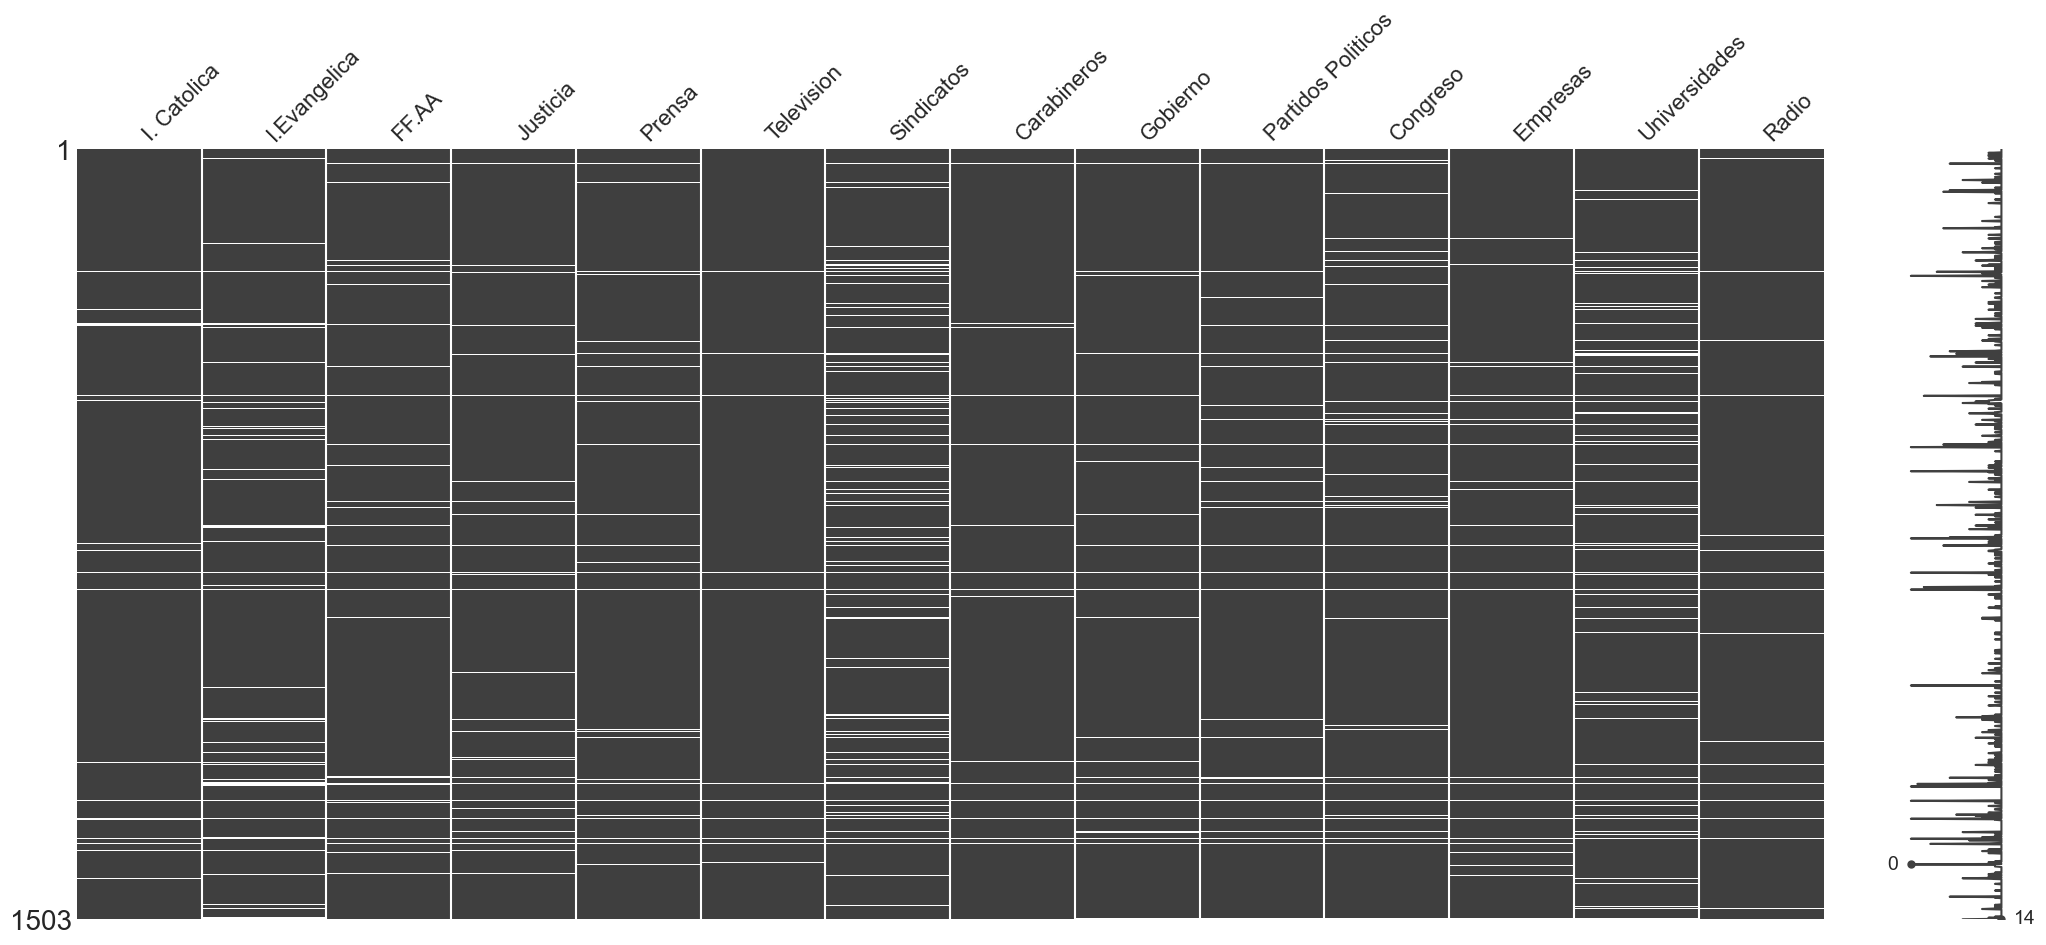

In [18]:
# Tambien se puede ver con la libreria missingo

magn.matrix(trust_df.replace([8, 9], [np.nan, np.nan]))

# De aqui, graficamente se puede ver que p17_g tiene la mayor cantidad de valores nulos

In [19]:
# Ahora, veremos las medias de cada uno de las columnas
variable, mean = [], []

for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())

tmp_df = pd.DataFrame({'var': variable, 'mean': mean}).sort_values(by='mean')

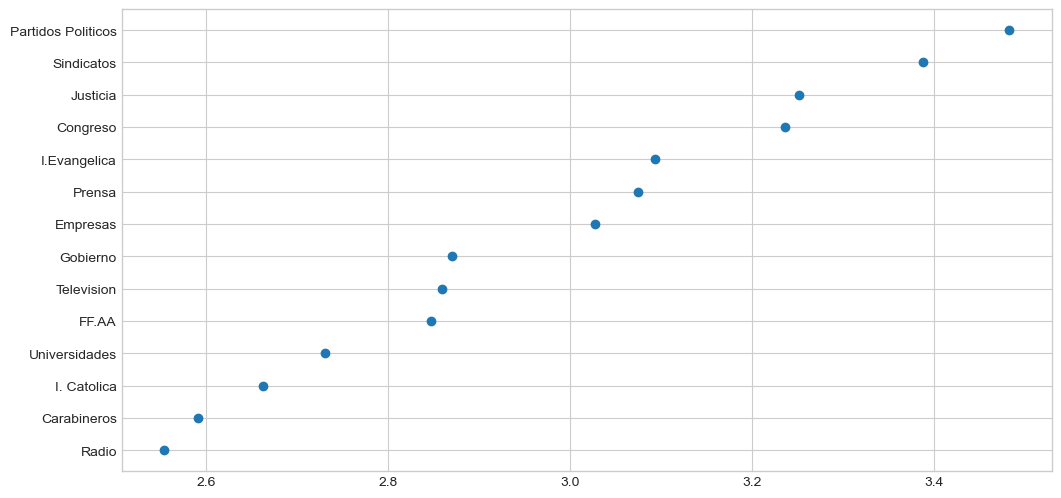

In [20]:
plt.plot(tmp_df['mean'], tmp_df['var'], 'o')

# Con el replace, se puede ver que los partidos politicos y sindicatos son los que generan mas
# desconfianza, justicia, congreso, etc...

# Supuestos de idoneidad factorial

Antes de hacer cualquier analisis factorial, es necesario que se cumpla el principio de esferacidad
de Bartlett. Este indica que al observar la matriz de correlacion entre variables, al menos
existen 2 variables que SI estan correlacionadas.

$H_{o} $= La matriz de correlacion es una matriz de identidad (No existe ninguna correlacion entre variables)

$H_{i} $= La matriz de correlacion NO es una matriz de identidad (Existe al menos una correlacion entre variables)

Para realizar este test se utiliza el modulo factor, con el metodo calculate_bartlett_sphericity()

In [21]:
factor.calculate_bartlett_sphericity(trust_df)

# En este caso se obtiene el estadistico, y el p-value. Como p < 0.05, se rechaza la hipotesis nula
# y existen al menos 2 variables correlacionadas en la matriz.

(6644.835705911945, 0.0)

# Verificar la existencia de algun factor latente

Luego de haber confirmado que existen al menos 2 variables que estan correlacionadas, es necesario
verificar si es que existe al menos 1 factor latente en nuestro set de datos. Esto se hace con
la prueba de Kaiser-Meyer-Olkin

$Prueba Kaiser-Meyer-Olkin$ = Si es > 0.7, entonces existe al menos 1 factor latente en nuestro set de datos

Si es < 0.7, entonces NO existe un factor latente en nuestro set de datos.

In [22]:
factor.calculate_kmo(trust_df)

# En este array se ve la importancia especifica de cada una de las variables, y el KMO global del modelo
# Como el valor global es mayor que 0.7, entonces existe al menos 1 factor latente en el modelo
# Si el valor fuera menor a 0.7, entonces hay que eliminar las variables que aporten poco al KMO
# global, y ver si es que aumenta el KMO.

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]),
 0.9274657194111268)

# Extraccion de Valores

Una vez que ya vimos que nuestros datos estan correlacionados, y que existe al menos 1 factor
latente, entonces debemos extraer este/estos factores.

Inicialmente es innecesario indicar cuantos factores queremos extraer con FactorAnalyzer. Por default obtiene 3.

- Aqui se utiliza varimax como rotacion. Esto significa que hara una linea recta que fitee a las diversas variables, y maximizara la varianza de cada una de las variables. Creo que es muy similar al PCA, al final maximiza la distancia entre la proyeccion de los puntos a la recta y el centro???.

# 1. Instanciar nuestro Analizador de factores

- Sin necesidad de poner cuantos factores queremos obtener

In [23]:
factorize = factor.FactorAnalyzer(rotation='varimax')

# 2. Pasar los datos a un fit

In [24]:
factorize.fit(trust_df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

# 3. Obtener los eigenvalues con .get_eigenvalues()

Recordar que los eigenvalues se obtienen de la siguiente manera:
- Generar una linea recta
- Proyectar los puntos o datos a la linea recta (trazar las distancias)
- Calcular la distancia del punto al centro de la recta
- Obtener la suma de los cuadrados de las distancias de cada punto
- Este es el eigenvalue de la recta

Para obtener la varianza alrededor de la recta (Cuanto esta explicando cada factor), se utiliza la siguiente formula:

$\frac{SumaCuadradosDistanciaDelFactor}{n-1} = Variacion explicada por el factor$

Al final, siempre se generan todos los posibles factores que se pueden representar (que es igual a la cantidad de variables que tienen nuestros datos). Ahora, cada factor (o componente principal por lo que estoy cachando) explica una cantidad de la varianza total de los datos (La distancia de los puntos al centro del componente).

## Eigenvalues decrecientes

Recordemos que varimax maximiza la cantidad de varianza explicada por cada factor. Debido a lo anterior, el primer factor latente explicara la mayor cantidad de varianza de los datos. El segundo valor latente explicara menor que el primero, pero mas que el tercero. Por lo tanto, los factores latentes van decreciendo en varianza explicada.

# Obtener los valores de cada factor propio

In [25]:
factor_eigenvalue = factorize.get_eigenvalues()[0]

# Aqui se extraen la mayor cantidad de factores latentes que se pueden
# obtener (la misma cantidad de columnas que los datos)

# Estos son valores propios

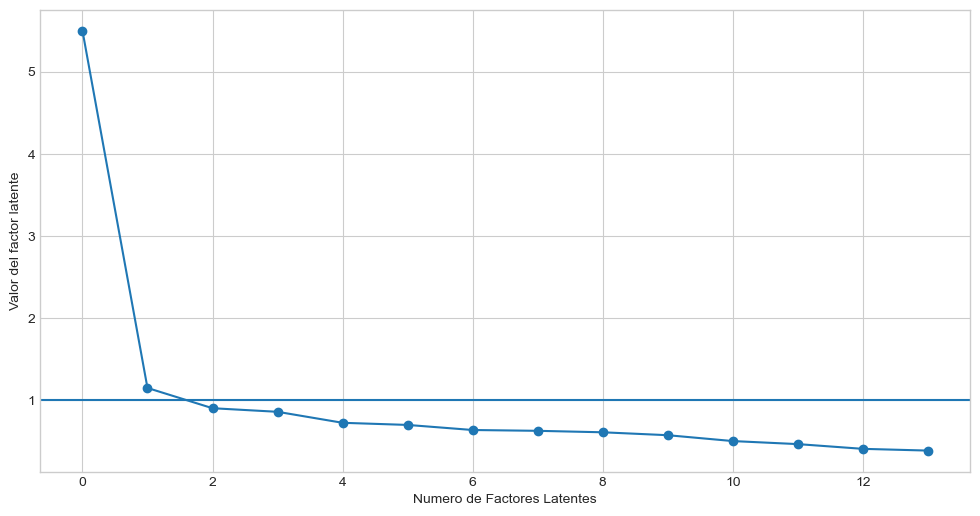

In [26]:
plt.plot(range(len(factor_eigenvalue)), factor_eigenvalue, 'o-')
plt.xlabel('Numero de Factores Latentes')
plt.ylabel('Valor del factor latente')
plt.axhline(1)

# Como se puede ver, hay 2 factores con un valor mayor a 1 (Por lo que explican mas de
# 1 variable/columna de nuestros datos)

# Con estos resultados, entonces extraeremos solamente 2 factores latentes!

In [27]:
factorize_2 = factor.FactorAnalyzer(n_factors=2, rotation='varimax')
factorize_2.fit(trust_df)
factorize_2.get_eigenvalues()[0]

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

# Extraccion e interpretacion de cargas factoriales

Una vez que ya se tienen los valores de cuanto estan explicando los factores latentes, es necesario extraer los factores propios como tal. Con esto podemos ver el detalle de cuanto explica cada uno de los factores

# Cargas Factoriales

In [28]:
factorize_2.loadings_

# La primera columna es el factor 1, la segunda columna es
# el factor 2

# Cada una de las filas corresponde a las variables entregadas

array([[0.2115378 , 0.48207631],
       [0.18909242, 0.31556017],
       [0.44635957, 0.4410592 ],
       [0.49501859, 0.36986145],
       [0.39299559, 0.50611705],
       [0.20838918, 0.7000665 ],
       [0.50838434, 0.18316639],
       [0.24972885, 0.5685152 ],
       [0.51311237, 0.45708089],
       [0.66688535, 0.28831161],
       [0.72624282, 0.21479004],
       [0.56733533, 0.31276563],
       [0.44188951, 0.33202866],
       [0.24208803, 0.57256938]])

In [29]:
carga_factores = pd.DataFrame(factorize_2.loadings_, columns=['Factor 1', 'Factor 2'], index=trust_df.columns)
carga_factores

,Factor 1,Factor 2
I. Catolica,0.211538,0.482076
I.Evangelica,0.189092,0.315560
FF.AA,0.446360,0.441059
Justicia,0.495019,0.369861
Prensa,0.392996,0.506117
Television,0.208389,0.700067
Sindicatos,0.508384,0.183166
Carabineros,0.249729,0.568515
Gobierno,0.513112,0.457081
Partidos Politicos,0.666885,0.288312


<AxesSubplot:>

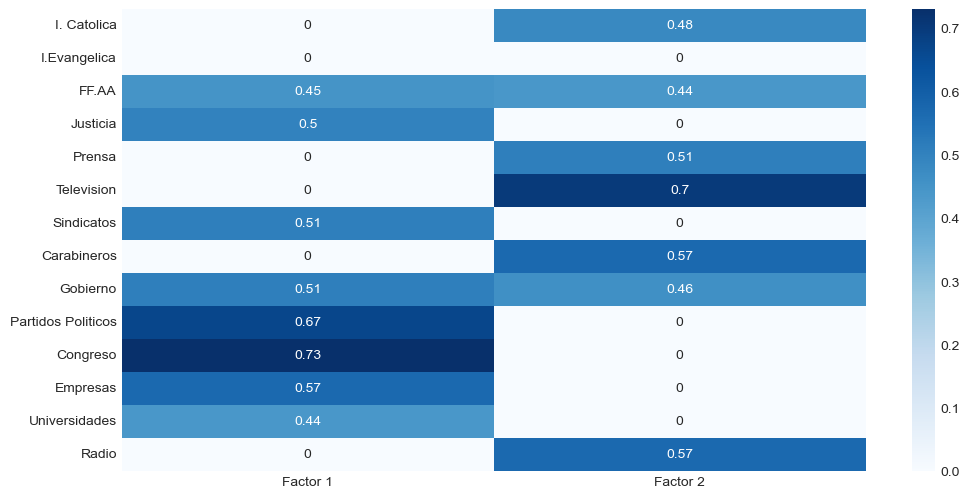

In [30]:
filtro_carga = carga_factores.applymap(lambda x: np.where(x > 0.4, round(x, 2), 0))
sns.heatmap(filtro_carga, cmap='Blues', annot=True)
# Cada uno de los factores de cada variable se pueden interpretar como pendientes de una regresion
# lineal de cada uno de los factores. 

In [31]:
# Al parecer el factor 1 captura la desconfianza de instituciones politicas "mas serias"
# El factor 2 al parecer explica la desconfianza de instituciones menos conocidas en ese tiempo

# Visualizacion de cargas

Con un scatterplot se puede ver la distribucion de cargas de nuestros factores

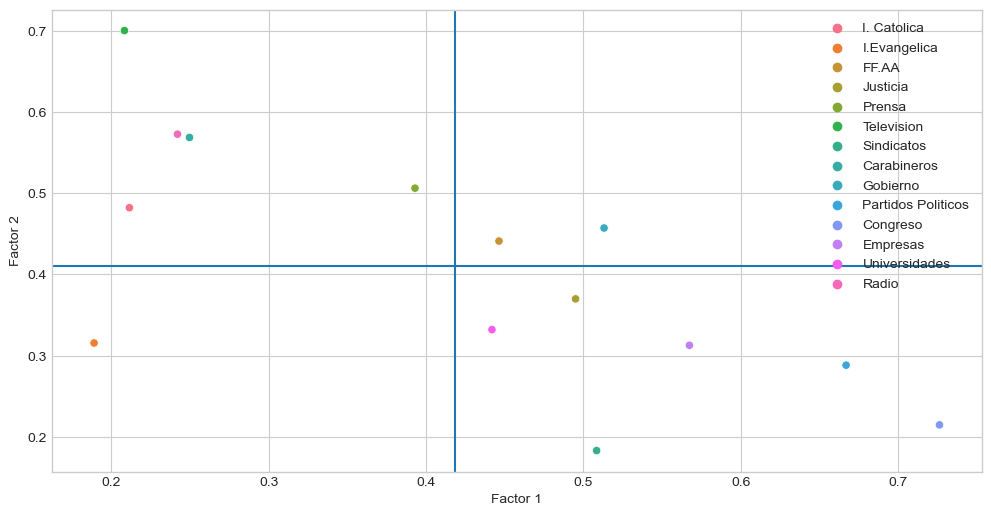

In [32]:
sns.scatterplot(data=carga_factores, x='Factor 1', y='Factor 2', hue=carga_factores.index)
plt.axvline(carga_factores['Factor 1'].mean())
plt.axhline(carga_factores['Factor 2'].mean())

# Aqui se puede ver que los datos de ambos factores estan medianamente
# separados, lo que es bueno! Y se puede ver una agrupacion de datos, que es el fin
# de este metodo

# Varianza explicada por los factores

Ahora, podemos ver cuanto varianza esta explicando cada uno de los factores creados! La suma de todos los factores suma el total de la varianza de los datos originales

In [33]:
factor_var = factorize_2.get_factor_variance()

In [34]:
df = pd.DataFrame(factor_var, columns=['Factor 1', 'Factor 2'],
                  index=['Sum of squared loadings (variance)', 'Proportional Variance', 'Cumulative variance'])

In [35]:
df

,Factor 1,Factor 2
Sum of squared loadings (variance),2.854667,2.640396
Proportional Variance,0.203905,0.188600
Cumulative variance,0.203905,0.392504


In [36]:
# Por lo tanto, el factor 1 explica el 20% de la varianza total de los datos
# El factor 2 explica el 18.8% de la varianza total!s

# Transformar los datos!

Finalmente, como ya tenemos nuestros factores y los analizamos, ahora podemos transformar nuestras 14 variables en 2!. Para esto utilizamos el analizador de factores con transform:

In [37]:
factorize_2.transform(trust_df)
# Y listo, ya transformamos todos nuestros datos :D!

array([[-0.67809168,  0.33784116],
       [-0.04809729, -0.00985878],
       [ 0.54219961,  0.42465027],
       ...,
       [-0.22806842,  0.13539122],
       [-0.03749916, -0.04883833],
       [ 4.13069653, -0.00732222]])

# ------------------------------------------------------------------

# Analisis de Componentes Principales (PCA)

No es metodo analitico. Mapea las coordenadas/variables en una variable que resume a varias.
Es similar al analisis de factores, pero sin agrupar variables por su correlacion. Aqui tambien
se hace una recta que fittea a varias variables. El mejor fit es el que maximiza la varianza
o la suma de la distancia de los datos al centro de la recta hecha.

- Los componentes deben ser perpendiculares entre si

## Caso de uso de PCA

Cuando hay muchas variables, pero pocos datos

In [38]:
from sklearn.datasets import load_digits
df = load_digits()

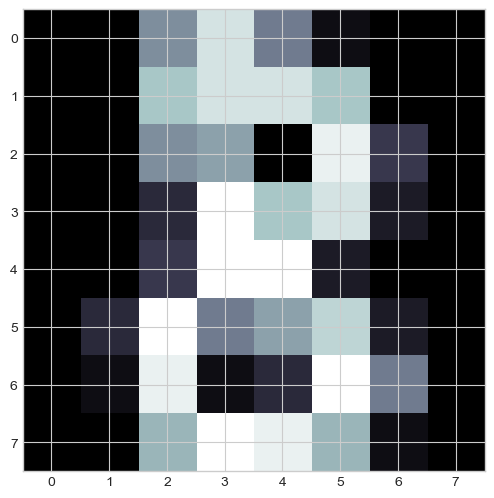

In [40]:
df.data[8]

# Es un array unidimensional. Los datos van de 0 a 1, y corresponden a saturaciones en la escala
# de los grises

plt.imshow(df.data[8].reshape([8, 8]), cmap='bone')

## Implementacion de PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
# La cantidad de dimensiones que se quieren obtener son arbitrarias
dimred = PCA(n_components=2)

In [44]:
# fit_transform primero estandariza los datos (los centra en 0, que es el primer paso muy necesario
# en PCA) y luego los fittea y hace los componentes
project_x = dimred.fit_transform(df.data)

In [45]:
df.data.shape

(1797, 64)

In [49]:
project_x.shape
# Como se puede ver, se redujo la cantidad de variables desde 64 a 2!

(1797, 2)

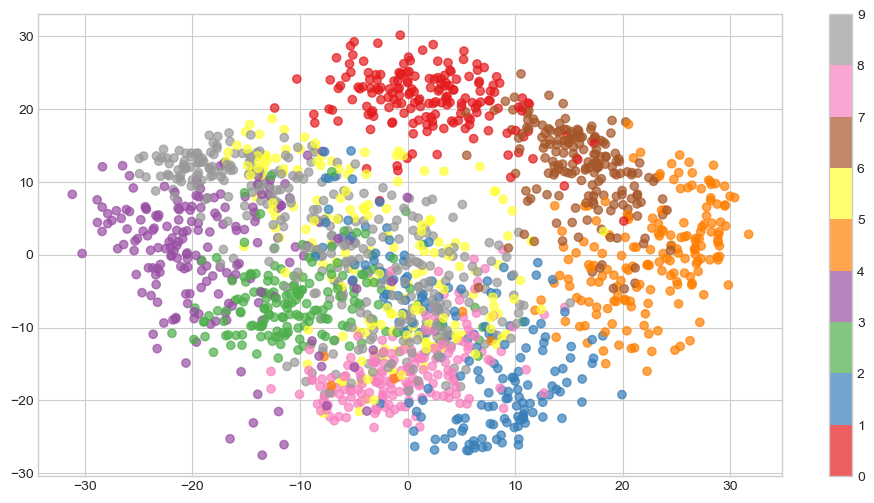

In [53]:
plt.scatter(project_x[:, 0], project_x[:, 1], c=df.target, alpha=0.7, cmap='Set1')
plt.colorbar()

# Como se puede ver, se generaron diversos grupos para cada tipo de digito hecho
# Por ejempolo, los grupos de 3 y 9 se agrupan en un espacio similar.
# El digito 0 se agrupa por si solo
# El digito 4 y 6 se agrupan en un mismo espacio.


# Objetivo de PCA

Maximizar la varianza explicada por cada uno de las reducciones de dimensiones (Componentes).

In [57]:
dimred.explained_variance_ratio_
# Esto estaria diciendo que el componente 1 explica el 15% de la varianza y el 2do el 14%.
# Ambas explican el 29% de la varianza total, lo que igual es muy mejorable.

array([0.14890594, 0.13618771])

# Cuantos componentes debemos utilizar?

Es innecesario definir previamente cuantas dimensiones hacer, si no que se ver todas y 
seleccionarlas

In [62]:
fetch_dim = PCA().fit(df.data)
n_dims = len(fetch_dim.components_)

In [64]:
n_dims
# La mayor cantidad de dimensiones que se pueden generar son la misma cantidad de variables que ya
# tiene el array.

64

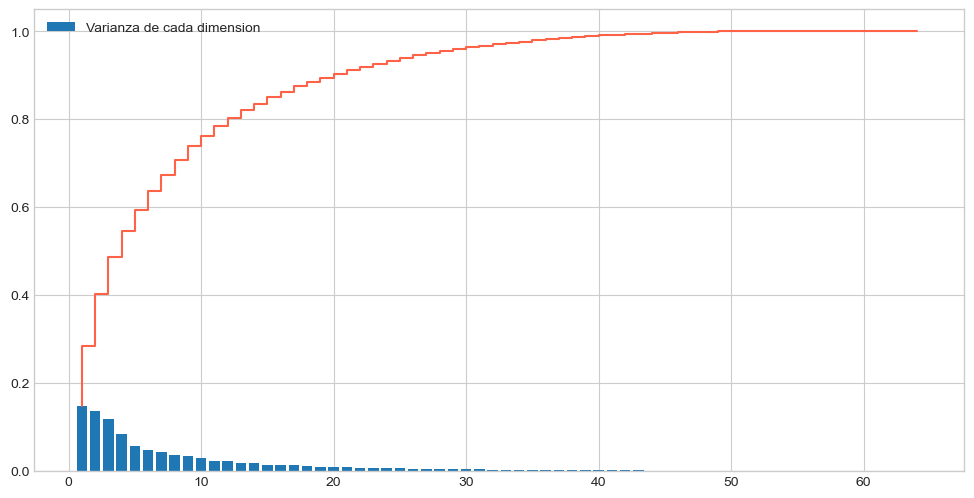

In [70]:
plt.bar(range(1, n_dims + 1), fetch_dim.explained_variance_ratio_,
        label='Varianza de cada dimension')
plt.legend()
# De aqui se puede ver que el factor 1 y 2 explican el 28% de la varianza. 

# Para ver la varianza acumulada

plt.step(range(1, n_dims + 1), np.cumsum(fetch_dim.explained_variance_ratio_), color='tomato')

# Aqui se puede ver que al utilizar aprox. 10 componentes, se explica casi el 80% de la varianza
# de los datos!

In [72]:
pca = PCA(n_components=10)
project_x = pca.fit_transform(df.data)
np.cumsum(pca.explained_variance_ratio_)

# Por lo tanto, con un pca de 10 componentes, se captura el 74% de la varianza total de los datos

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496351,
       0.59413255, 0.63729219, 0.67390517, 0.70743734, 0.73822251])

# Combinacion lineal de componentes

In [73]:
df.data[6]

array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
       14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
        0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
       11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.])

In [74]:
# Ahora, de forma similar a el analisis de factores, cada uno de los componentes esta compuesto
# de una combinacion lineal de los datos originales!. Nuevamente, cada una de las variables aporta
# de forma diferencial para cada componetne

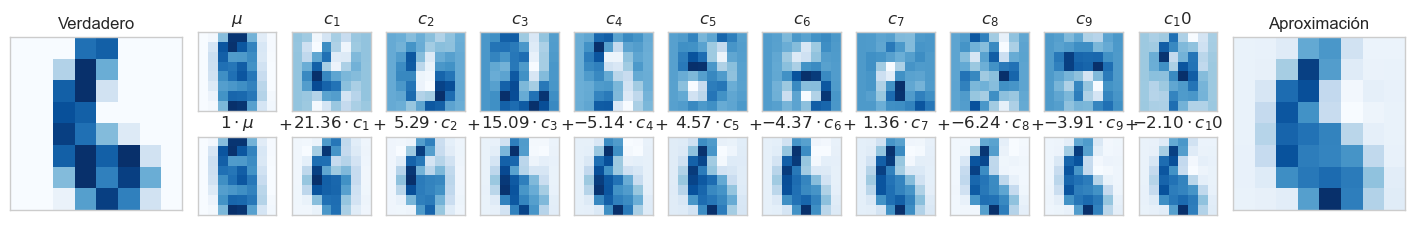

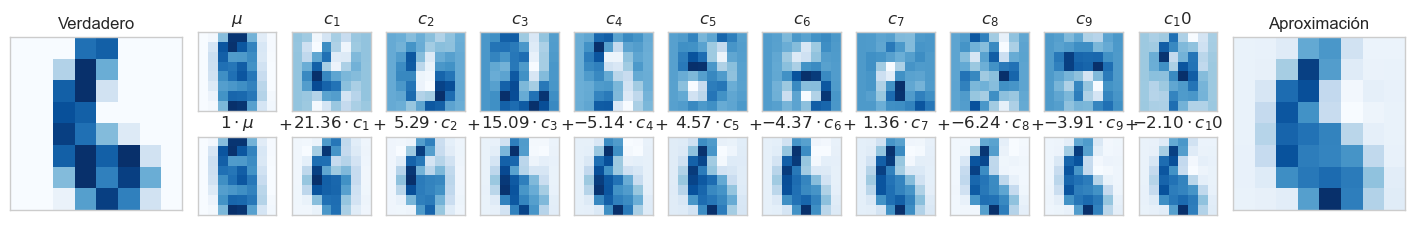

In [80]:
gfx.plot_pca_components(df.data[6], project_x[6], pca.mean_, pca.components_)
# Por lo tanto, aqui se puede ver como cada uno de los componentes estan aportando a la reconstruccion
# de los datos originales. Ademas, se pueden ver los coeficientes de cada uno de los componentes.

In [79]:
project_x.shape

(1797, 10)